In [9]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats  # Make sure this is imported

In [11]:
df = pd.read_csv("Lung Cancer Dataset.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [12]:
df.describe()

AGE       GENDER      SMOKING  FINGER_DISCOLORATION  \
count  5000.000000  5000.000000  5000.000000             5000.0000   
mean     57.222800     0.501200     0.666400                0.6012   
std      15.799224     0.500049     0.471546                0.4897   
min      30.000000     0.000000     0.000000                0.0000   
25%      44.000000     0.000000     0.000000                0.0000   
50%      57.000000     1.000000     1.000000                1.0000   
75%      71.000000     1.000000     1.000000                1.0000   
max      84.000000     1.000000     1.000000                1.0000   

       MENTAL_STRESS  EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  \
count    5000.000000            5000.000000        5000.000000   5000.000000   
mean        0.539800               0.516000           0.439200     55.032043   
std         0.498463               0.499794           0.496339      7.913083   
min         0.000000               0.000000           0.000000     23.258308   
25%         0.000000               0.000000           0.000000     49.440685   
50%         1.000000               1.000000           0.000000     55.050421   
75%         1.000000               1.000000           1.000000     60.323320   
max         1.000000               1.000000           1.000000     83.046971   

       IMMUNE_WEAKNESS  BREATHING_ISSUE  ALCOHOL_CONSUMPTION  \
count      5000.000000       5000.00000          5000.000000   
mean          0.394800          0.80040             0.354200   
std           0.488857          0.39974             0.478318   
min           0.000000          0.00000             0.000000   
25%           0.000000          1.00000             0.000000   
50%           0.000000          1.00000             0.000000   
75%           1.000000          1.00000             1.000000   
max           1.000000          1.00000             1.000000   

       THROAT_DISCOMFORT  OXYGEN_SATURATION  CHEST_TIGHTNESS  FAMILY_HISTORY  \
count        5000.000000        5000.000000      5000.000000     5000.000000   
mean            0.698200          94.991029         0.600600        0.301800   
std             0.459085           1.481048         0.489824        0.459085   
min             0.000000          89.923133         0.000000        0.000000   
25%             0.000000          93.973176         0.000000        0.000000   
50%             1.000000          94.974073         1.000000        0.000000   
75%             1.000000          95.989272         1.000000        1.000000   
max             1.000000          99.795786         1.000000        1.000000   

       SMOKING_FAMILY_HISTORY  STRESS_IMMUNE  
count             5000.000000    5000.000000  
mean                 0.204000       0.209600  
std                  0.403009       0.407064  
min                  0.000000       0.000000  
25%                  0.000000       0.000000  
50%                  0.000000       0.000000  
75%                  0.000000       0.000000  
max                  1.000000       1.000000

In [6]:
df.head(100)

AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0    68       1        1                     1              1   
1    81       1        1                     0              0   
2    58       1        1                     0              0   
3    44       0        1                     0              1   
4    72       0        1                     1              1   
..  ...     ...      ...                   ...            ...   
95   45       0        1                     0              1   
96   74       0        1                     1              1   
97   47       1        1                     1              1   
98   76       1        0                     1              0   
99   82       1        0                     1              0   

    EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                       1                  0     57.831178                0   
1                       1                  1     47.694835                1   
2                       0                  0     59.577435                0   
3                       1                  0     59.785767                0   
4                       1                  1     59.733941                0   
..                    ...                ...           ...              ...   
95                      0                  0     57.618732                0   
96                      0                  1     62.772174                0   
97                      0                  0     50.967305                1   
98                      1                  0     43.922645                1   
99                      1                  1     49.543908                0   

    BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  \
0                 0                    1                  1   
1                 1                    0                  1   
2                 1                    1                  0   
3                 1                    0                  1   
4                 1                    0                  1   
..              ...                  ...                ...   
95                1                    0                  0   
96                1                    1                  1   
97                1                    0                  1   
98                1                    0                  1   
99                1                    1                  0   

    OXYGEN_SATURATION  CHEST_TIGHTNESS  FAMILY_HISTORY  \
0           95.977287                1               0   
1           97.184483                0               0   
2           94.974939                0               0   
3           95.187900                0               0   
4           93.503008                0               0   
..                ...              ...             ...   
95          94.628644                1               1   
96          96.532630                1               0   
97          95.748247                0               0   
98          93.220534                1               0   
99          94.052590                1               1   

    SMOKING_FAMILY_HISTORY  STRESS_IMMUNE PULMONARY_DISEASE  
0                        0              0                NO  
1                        0              0               YES  
2                        0              0                NO  
3                        0              0               YES  
4                        0              0               YES  
..                     ...            ...               ...  
95                       1              0               YES  
96                       0              0               YES  
97                       0              1               YES  
98                       0              0                NO  
99                       0              0                NO  

[100 rows x 18 columns]

In [13]:
df.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

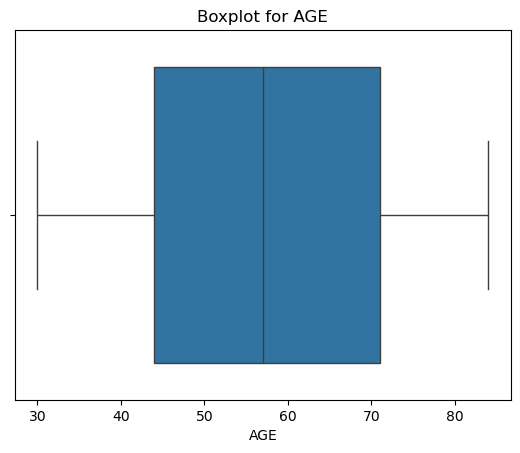


Number of outliers in 'AGE': 0
Empty DataFrame
Columns: [AGE, GENDER, SMOKING, FINGER_DISCOLORATION, MENTAL_STRESS, EXPOSURE_TO_POLLUTION, LONG_TERM_ILLNESS, ENERGY_LEVEL, IMMUNE_WEAKNESS, BREATHING_ISSUE, ALCOHOL_CONSUMPTION, THROAT_DISCOMFORT, OXYGEN_SATURATION, CHEST_TIGHTNESS, FAMILY_HISTORY, SMOKING_FAMILY_HISTORY, STRESS_IMMUNE, PULMONARY_DISEASE]
Index: []

Outliers detected by Z-score (>3): 0
Empty DataFrame
Columns: [AGE, AGE_Zscore]
Index: []


In [14]:
# Example: Boxplot for 'Age' column
sns.boxplot(x=df['AGE'])
plt.title("Boxplot for AGE")
plt.show()

# IQR Method to detect outliers for 'Age'
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]
print(f"\nNumber of outliers in 'AGE': {outliers.shape[0]}")
print(outliers)

# Optional: Z-score method (e.g., for Age)
df['AGE_Zscore'] = np.abs(stats.zscore(df['AGE']))
outliers_z = df[df['AGE_Zscore'] > 3]
print(f"\nOutliers detected by Z-score (>3): {outliers_z.shape[0]}")
print(outliers_z[['AGE', 'AGE_Zscore']])

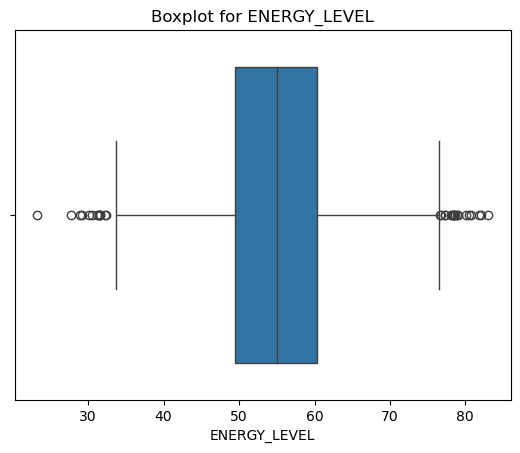


Number of outliers in 'ENERGY_LEVEL': 31
      AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
249    48       1        0                     0              1   
441    38       1        1                     1              1   
603    32       1        1                     0              0   
758    68       1        1                     0              0   
1103   81       1        0                     1              1   
1177   62       0        1                     1              1   
1282   62       1        0                     1              0   
1368   75       0        1                     1              1   
1439   61       0        0                     0              0   
1487   79       0        1                     1              1   
1640   69       1        1                     0              1   
1698   39       0        0                     0              0   
1866   78       1        1                     1              1   
1877   49       0   

In [16]:
 #Example: Boxplot for 'ENERGY_LEVEL' column
sns.boxplot(x=df['ENERGY_LEVEL'])
plt.title("Boxplot for ENERGY_LEVEL")
plt.show()

# IQR Method to detect outliers for 'Age'
Q1 = df['ENERGY_LEVEL'].quantile(0.25)
Q3 = df['ENERGY_LEVEL'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['ENERGY_LEVEL'] < lower_bound) | (df['ENERGY_LEVEL'] > upper_bound)]
print(f"\nNumber of outliers in 'ENERGY_LEVEL': {outliers.shape[0]}")
print(outliers)

# Optional: Z-score method (e.g., for Age)
df['ENERGY_LEVEL_Zscore'] = np.abs(stats.zscore(df['ENERGY_LEVEL']))
outliers_z = df[df['ENERGY_LEVEL_Zscore'] > 3]
print(f"\nOutliers detected by Z-score (>3): {outliers_z.shape[0]}")
print(outliers_z[['ENERGY_LEVEL', 'ENERGY_LEVEL_Zscore']])

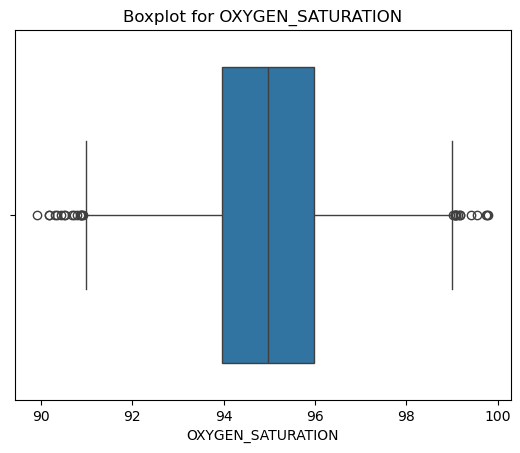


Number of outliers in 'OXYGEN_SATURATION': 30
      AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
84     39       0        0                     1              1   
235    78       0        1                     0              1   
451    79       1        0                     1              0   
628    80       1        1                     0              0   
766    37       0        1                     1              1   
827    66       1        0                     1              1   
833    38       0        1                     1              1   
938    80       0        1                     1              0   
944    63       0        1                     0              0   
1055   76       1        0                     1              0   
1378   84       1        1                     1              1   
1506   63       1        1                     0              0   
1573   43       0        1                     1              1   
1844   75      

In [18]:
 #Example: Boxplot for 'OXYGEN_SATURATION' column
sns.boxplot(x=df['OXYGEN_SATURATION'])
plt.title("Boxplot for OXYGEN_SATURATION")
plt.show()

# IQR Method to detect outliers for 'Age'
Q1 = df['OXYGEN_SATURATION'].quantile(0.25)
Q3 = df['OXYGEN_SATURATION'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['OXYGEN_SATURATION'] < lower_bound) | (df['OXYGEN_SATURATION'] > upper_bound)]
print(f"\nNumber of outliers in 'OXYGEN_SATURATION': {outliers.shape[0]}")
print(outliers)

# Optional: Z-score method (e.g., for Age)
df['OXYGEN_SATURATION_Zscore'] = np.abs(stats.zscore(df['OXYGEN_SATURATION']))
outliers_z = df[df['OXYGEN_SATURATION_Zscore'] > 3]
print(f"\nOutliers detected by Z-score (>3): {outliers_z.shape[0]}")
print(outliers_z[['OXYGEN_SATURATION', 'OXYGEN_SATURATION_Zscore']])

Numeric columns detected: ['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS', 'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL', 'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION', 'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS', 'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE', 'AGE_Zscore', 'ENERGY_LEVEL_Zscore', 'OXYGEN_SATURATION_Zscore']

Outliers in 'AGE': 0
Outliers in 'GENDER': 0
Outliers in 'SMOKING': 0
Outliers in 'FINGER_DISCOLORATION': 0
Outliers in 'MENTAL_STRESS': 0
Outliers in 'EXPOSURE_TO_POLLUTION': 0
Outliers in 'LONG_TERM_ILLNESS': 0
Outliers in 'ENERGY_LEVEL': 15
Outliers in 'IMMUNE_WEAKNESS': 0
Outliers in 'BREATHING_ISSUE': 0
Outliers in 'ALCOHOL_CONSUMPTION': 0
Outliers in 'THROAT_DISCOMFORT': 0
Outliers in 'OXYGEN_SATURATION': 12
Outliers in 'CHEST_TIGHTNESS': 0
Outliers in 'FAMILY_HISTORY': 0
Outliers in 'SMOKING_FAMILY_HISTORY': 0
Outliers in 'STRESS_IMMUNE': 0
Outliers in 'AGE_Zscore': 0
Outliers in

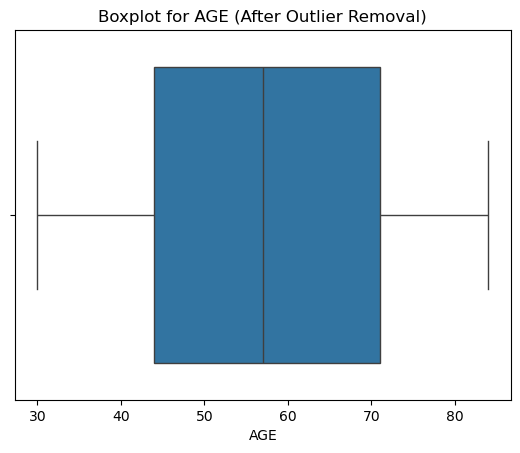

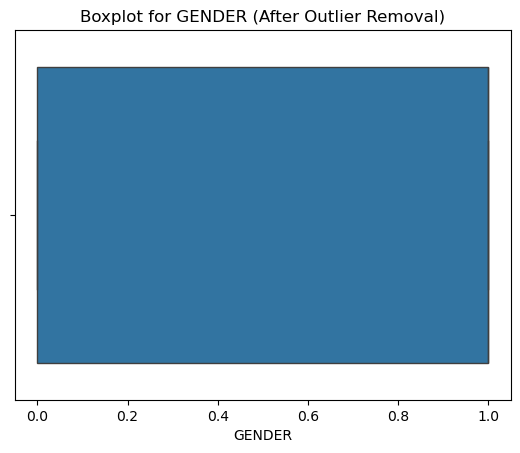

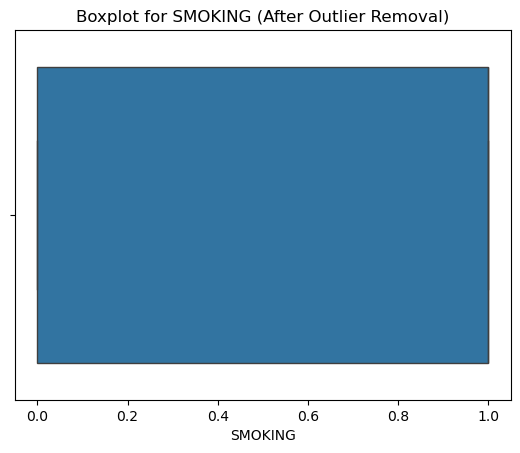

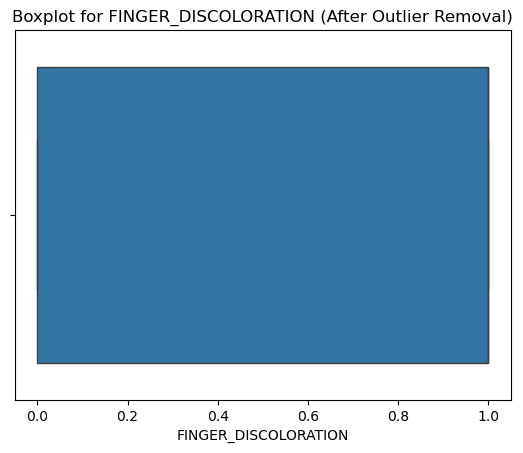

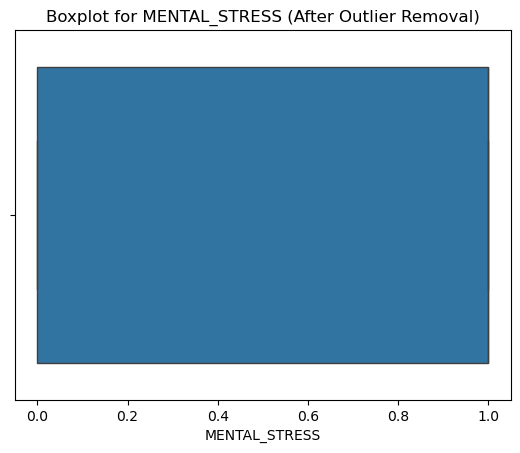

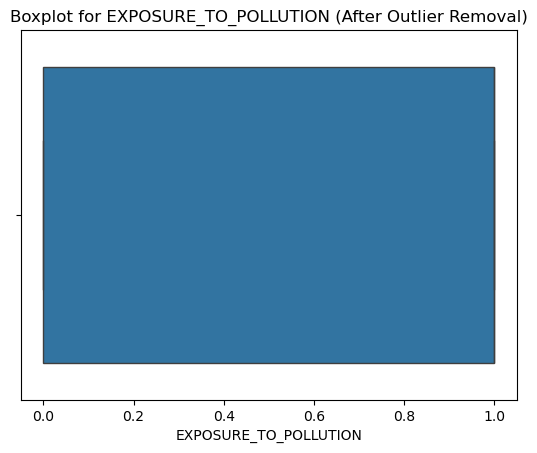

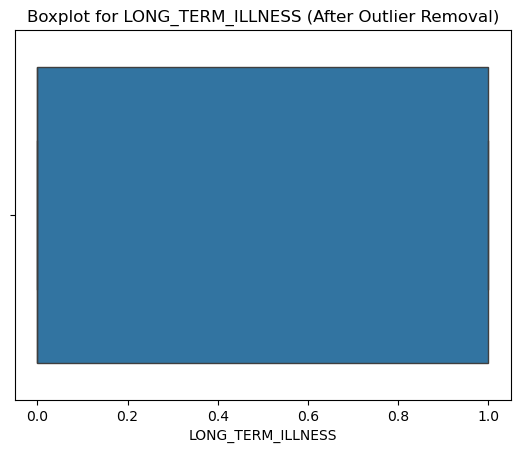

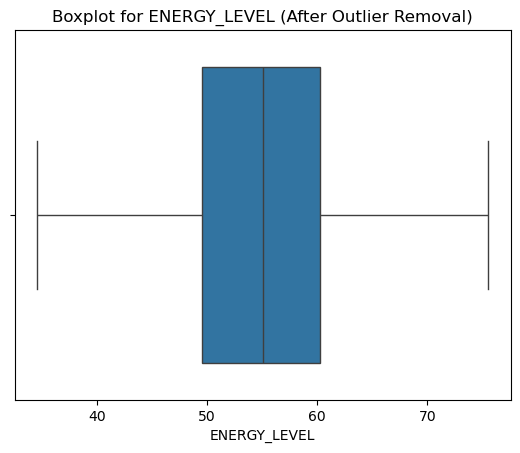

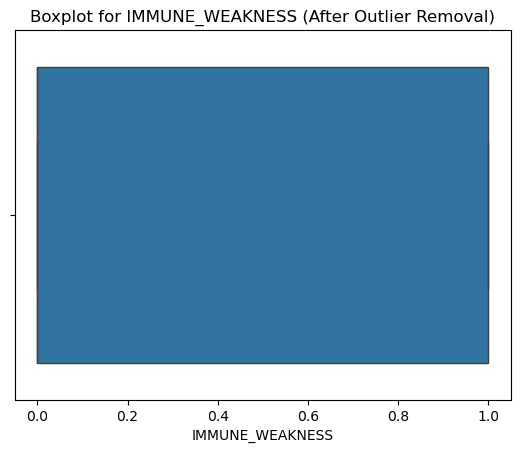

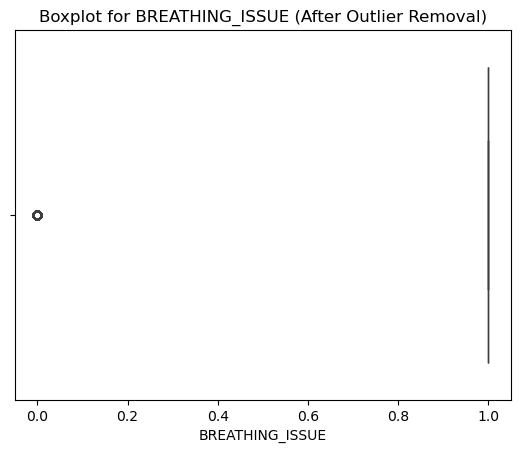

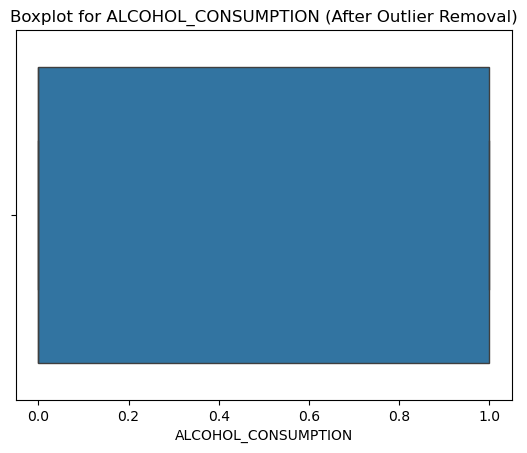

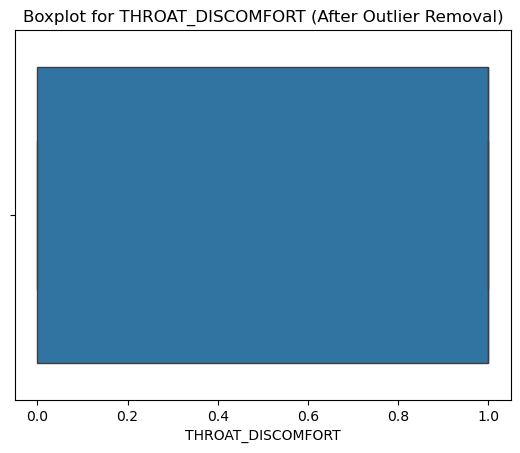

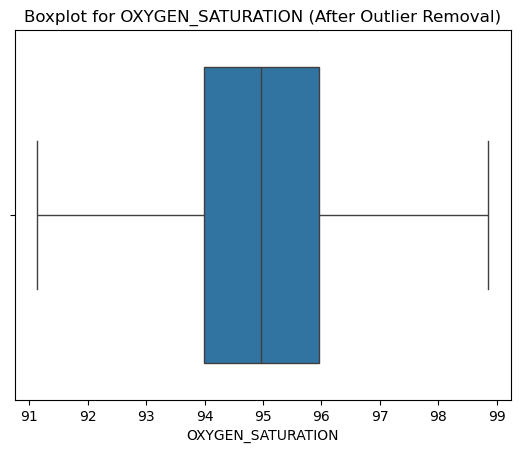

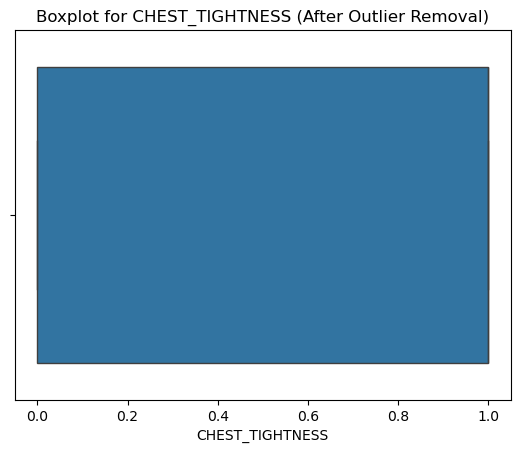

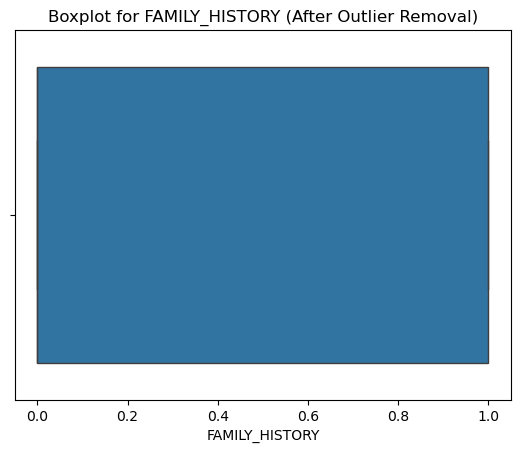

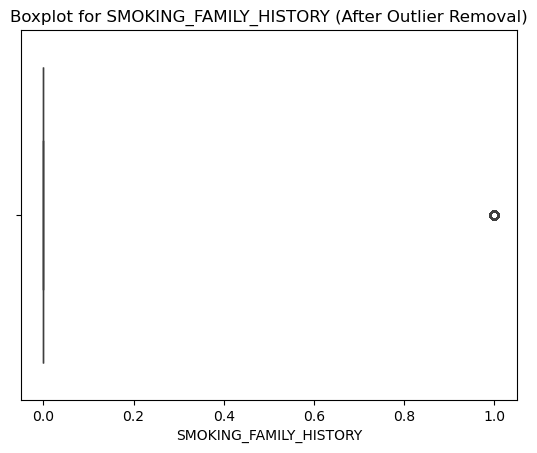

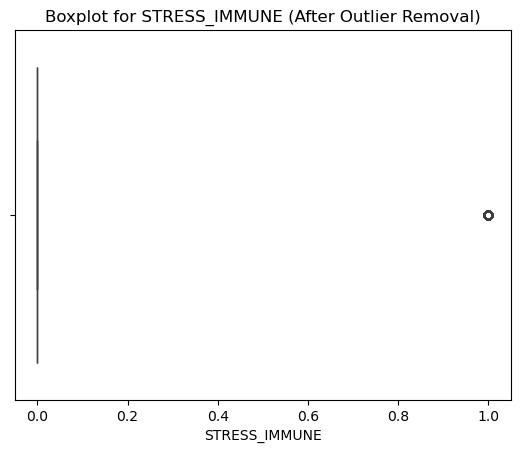

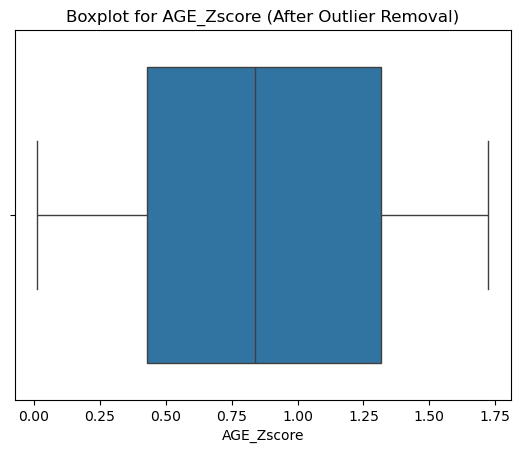

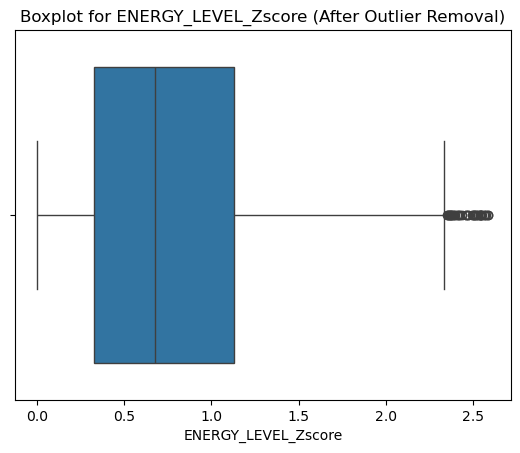

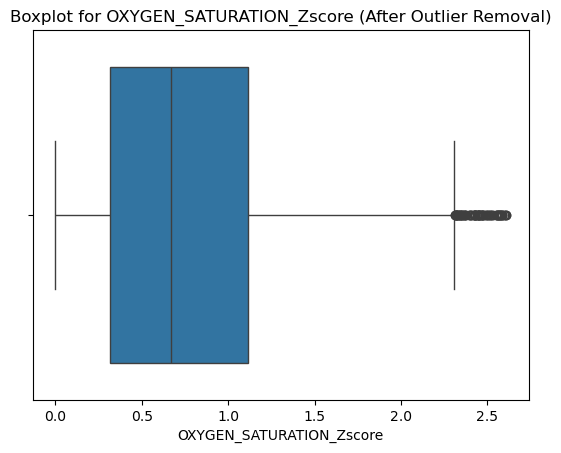

In [19]:
# Step 1: Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns detected: {list(numeric_cols)}\n")

# Step 2: Detect and count outliers per column
for col in numeric_cols:
    df[f'{col}_Zscore'] = np.abs(stats.zscore(df[col]))
    outlier_count = (df[f'{col}_Zscore'] > 3).sum()
    print(f"Outliers in '{col}': {outlier_count}")

# Step 3: Optionally, filter out strong outliers
# Remove rows where any numeric column has Z-score > 3
condition = (df[[f'{col}_Zscore' for col in numeric_cols]] <= 3).all(axis=1)
df_clean = df[condition]

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Dataset shape after removing strong outliers: {df_clean.shape}")

# Step 4: (Optional) Visualize distributions after cleaning
for col in numeric_cols:
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot for {col} (After Outlier Removal)")
    plt.show()

In [20]:
df.shape

(5000, 38)

In [21]:
df['PULMONARY_DISEASE'].value_counts()

PULMONARY_DISEASE
NO     2963
YES    2037
Name: count, dtype: int64

In [22]:
subsets=df.value_counts(subset=['SMOKING', 'PULMONARY_DISEASE'])
subsets

SMOKING  PULMONARY_DISEASE
1        YES                  1892
0        NO                   1523
1        NO                   1440
0        YES                   145
Name: count, dtype: int64

<Axes: ylabel='count'>

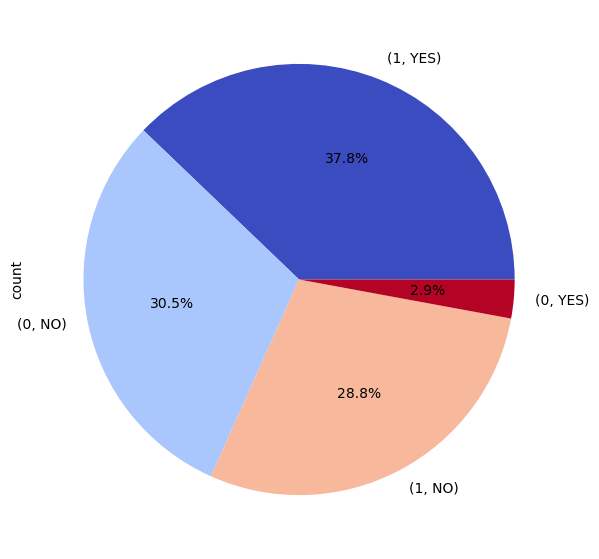

In [23]:
plt.figure(figsize=(7, 7))
subsets.plot.pie(autopct='%1.1f%%', cmap='coolwarm')

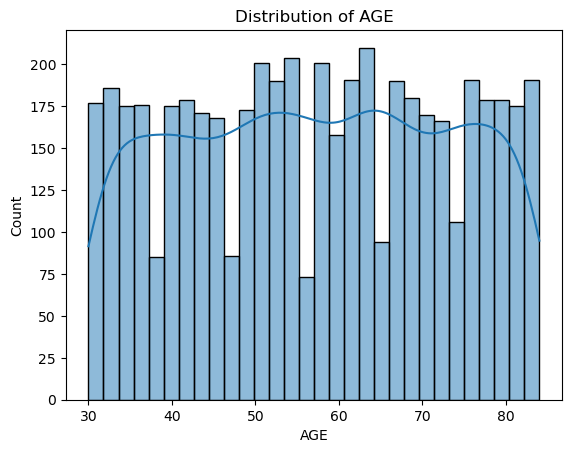

In [24]:
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Distribution of AGE')
plt.show()

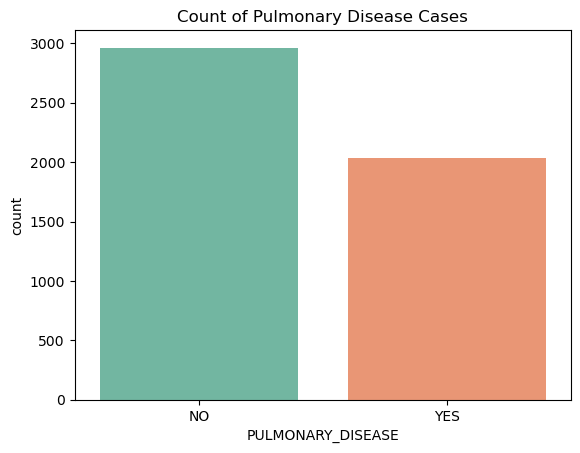

In [25]:
# Recommended: assign 'PULMONARY_DISEASE' to hue as well
sns.countplot(x='PULMONARY_DISEASE', hue='PULMONARY_DISEASE', data=df, palette='Set2', legend=False)
plt.title("Count of Pulmonary Disease Cases")
plt.show()

In [27]:
# Step 1: Replace values
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].replace({'NO': 0, 'YES': 1})

# Step 2: Explicitly convert to integer type
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].astype(int)

In [28]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
x = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape

(3500, 37)

In [31]:
X_test.shape

(1500, 37)

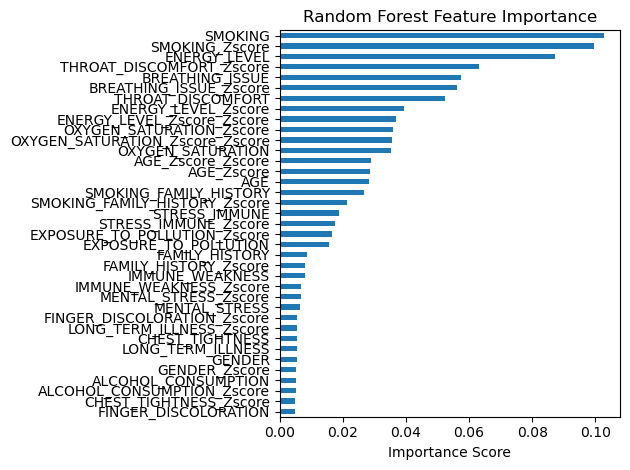

Top Features by Random Forest:
SMOKING                            0.102677
SMOKING_Zscore                     0.099544
ENERGY_LEVEL                       0.087342
THROAT_DISCOMFORT_Zscore           0.063009
BREATHING_ISSUE                    0.057325
BREATHING_ISSUE_Zscore             0.056077
THROAT_DISCOMFORT                  0.052419
ENERGY_LEVEL_Zscore                0.039250
ENERGY_LEVEL_Zscore_Zscore         0.036746
OXYGEN_SATURATION_Zscore           0.036022
OXYGEN_SATURATION_Zscore_Zscore    0.035708
OXYGEN_SATURATION                  0.035244
AGE_Zscore_Zscore                  0.028836
AGE_Zscore                         0.028530
AGE                                0.028271
SMOKING_FAMILY_HISTORY             0.026779
SMOKING_FAMILY_HISTORY_Zscore      0.021355
STRESS_IMMUNE                      0.018771
STRESS_IMMUNE_Zscore               0.017521
EXPOSURE_TO_POLLUTION_Zscore       0.016571
EXPOSURE_TO_POLLUTION              0.015524
FAMILY_HISTORY                     0.008659
F

In [33]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(x_scaled, y)

# Get feature importances
importances = rf.feature_importances_
features = pd.Series(importances, index=x.columns)

# Plot feature importances
features.sort_values(ascending=False).plot(kind='barh', title="Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  # Optional: largest at top
plt.tight_layout()
plt.show()

# Print top features
print("Top Features by Random Forest:")
print(features.sort_values(ascending=False))

In [34]:
num_attributes = df.select_dtypes(include=['int64', 'float64']).columns
cat_attributes = df.select_dtypes(include=['object']).columns
# Korelasi num_features
num_corr = df[num_attributes].corr()
# Membuat pairplot
sns.pairplot(df)
plt.show()

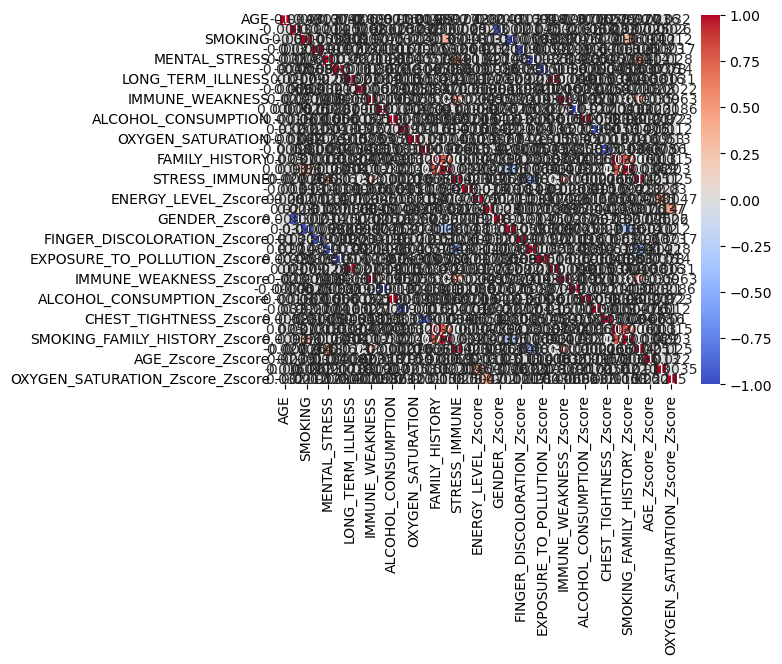

In [35]:
# Cek korelasi antar num_attributes
sns.heatmap(num_corr, cmap='coolwarm',annot=True)
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Training & Evaluation
def train_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy')

    print("✅ Sample of Training Labels:", y_train[:10].tolist())
    print("✅ Sample of Predictions:", y_pred[:10])
    print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
    print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"🔁 10-Fold Cross-Validation Accuracy Scores: {scores}")
    
    return model

# Hyperparameter Tuning
def hyperparameter_tuning(model, param_grid, X_train_scaled, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    print("🔧 Best Parameters:", grid_search.best_params_)
    return grid_search.best_params_

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Example feature matrix X and target vector y
# Replace this with your actual dataset
# X = your feature matrix
# y = your target labels

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression

# Define your base model
base_model = LogisticRegression()

# Define parameter grid
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Assuming X_train_scaled and y_train are defined

# Run tuning
best_params = hyperparameter_tuning(base_model, logreg_param_grid, X_train_scaled, y_train)

# Retrain with best parameters
trained_logreg = LogisticRegression(**best_params, random_state=42)
trained_logreg.fit(X_train_scaled, y_train)

🔧 Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}


LogisticRegression(C=0.1, random_state=42)

In [42]:
# Run Tuning
best_params = hyperparameter_tuning(base_model, logreg_param_grid, X_train_scaled, y_train)
# Next, You Can Retrain the Best Logistic Regression:

# Train final model with best params
trained_logreg = LogisticRegression(**best_params, random_state=42)
trained_logreg.fit(X_train_scaled, y_train)

🔧 Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}


LogisticRegression(C=0.1, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define Base Model
base_model = LogisticRegression(random_state=42, solver='liblinear')

# Parameter Grid for Tuning
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

# Grid Search Function
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"🔧 Best Parameters: {grid.best_params_}")
    return grid.best_params_

# Run Tuning
best_params = hyperparameter_tuning(base_model, logreg_param_grid, X_train_scaled, y_train)















🔧 Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [22]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Hyperparameter tuning
best_params = hyperparameter_tuning(base_model, logreg_param_grid, X_train_scaled, y_train)

🔧 Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train final model with best parameters
final_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
final_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = final_model.predict(X_test_scaled)

# Evaluation
print("\n🔍 Model Performance:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


🔍 Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       859
           1       0.88      0.89      0.89       641

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500

Accuracy: 0.90


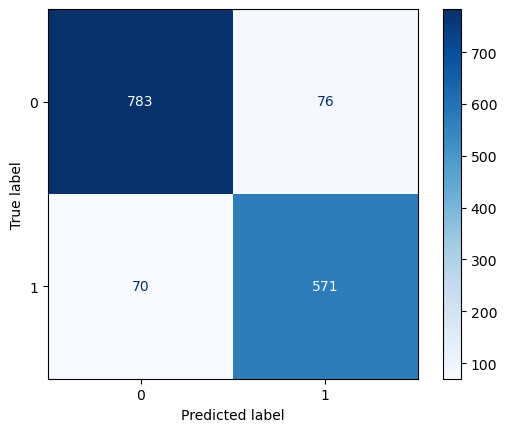

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

In [44]:
# Retrain using best parameters
best_logreg = LogisticRegression(**best_params, max_iter=1000)
trained_logreg = train_model(best_logreg, X_train_scaled, y_train, X_test_scaled, y_test)


✅ Sample of Training Labels: [0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
✅ Sample of Predictions: [0 0 0 0 0 1 1 1 0 0]
🎯 Accuracy: 0.9060

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       859
           1       0.88      0.90      0.89       641

    accuracy                           0.91      1500
   macro avg       0.90      0.91      0.90      1500
weighted avg       0.91      0.91      0.91      1500

📉 Confusion Matrix:
 [[782  77]
 [ 64 577]]
🔁 10-Fold Cross-Validation Accuracy Scores: [0.91142857 0.88       0.91142857 0.91428571 0.89428571 0.91428571
 0.89142857 0.90285714 0.89428571 0.89714286]


In [48]:
#ROC Curve & AUC Score


In [49]:
y_train = y_train.replace({'NO': 0, 'YES': 1}).astype(int)
y_test = y_test.replace({'NO': 0, 'YES': 1}).astype(int)

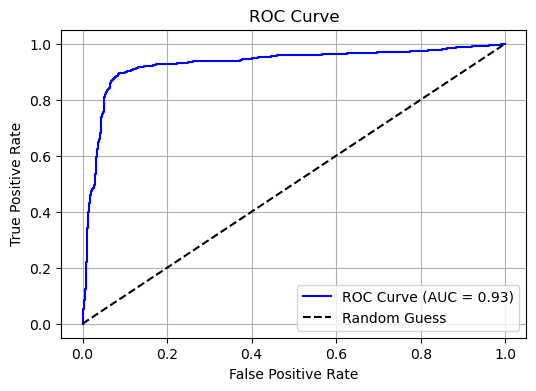

In [51]:

# Train example model
from sklearn.metrics import roc_curve, roc_auc_score
final_model = LogisticRegression(random_state=42, solver='liblinear')
final_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_proba = final_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Cross-Validation (Optional but Strongly Recommended)



In [52]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on training set
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [0.89285714 0.91       0.90285714 0.89285714 0.89285714]
Mean CV Accuracy: 0.90


In [53]:
# Check feature importance (for Logistic Regression)
import numpy as np

feature_names = X.columns  # Assuming 'X' is the original unscaled feature DataFrame
coefficients = final_model.coef_[0]

# Display feature importance
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

AGE: 0.0526
GENDER: -0.0003
SMOKING: 0.7775
FINGER_DISCOLORATION: 0.0219
MENTAL_STRESS: -0.0220
EXPOSURE_TO_POLLUTION: 0.1972
LONG_TERM_ILLNESS: -0.0019
ENERGY_LEVEL: 0.7023
IMMUNE_WEAKNESS: 0.0429
BREATHING_ISSUE: 0.6075
ALCOHOL_CONSUMPTION: -0.0145
THROAT_DISCOMFORT: 0.6077
OXYGEN_SATURATION: 0.0824
CHEST_TIGHTNESS: 0.0332
FAMILY_HISTORY: -0.1594
SMOKING_FAMILY_HISTORY: 0.4399
STRESS_IMMUNE: 0.3657
AGE_Zscore: 0.0153
ENERGY_LEVEL_Zscore: -0.1662
OXYGEN_SATURATION_Zscore: 0.0269
GENDER_Zscore: 0.0003
SMOKING_Zscore: -0.7775
FINGER_DISCOLORATION_Zscore: -0.0219
MENTAL_STRESS_Zscore: 0.0220
EXPOSURE_TO_POLLUTION_Zscore: -0.1972
LONG_TERM_ILLNESS_Zscore: -0.0019
IMMUNE_WEAKNESS_Zscore: 0.0429
BREATHING_ISSUE_Zscore: -0.6075
ALCOHOL_CONSUMPTION_Zscore: -0.0145
THROAT_DISCOMFORT_Zscore: -0.6077
CHEST_TIGHTNESS_Zscore: -0.0332
FAMILY_HISTORY_Zscore: -0.1594
SMOKING_FAMILY_HISTORY_Zscore: 0.4399
STRESS_IMMUNE_Zscore: 0.3657
AGE_Zscore_Zscore: 0.0298
ENERGY_LEVEL_Zscore_Zscore: -0.0167
OXYGEN

In [ ]:
#Decision Tree Classificier 🎄

✅ Sample of Training Labels: [0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
✅ Sample of Predictions: [0 0 0 0 0 1 1 1 0 1]
🎯 Accuracy: 0.8187

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       859
           1       0.79      0.78      0.79       641

    accuracy                           0.82      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.82      0.82      0.82      1500

📉 Confusion Matrix:
 [[725 134]
 [138 503]]
🔁 10-Fold Cross-Validation Accuracy Scores: [0.84285714 0.81428571 0.84857143 0.82       0.80857143 0.87142857
 0.82857143 0.84285714 0.84       0.85428571]


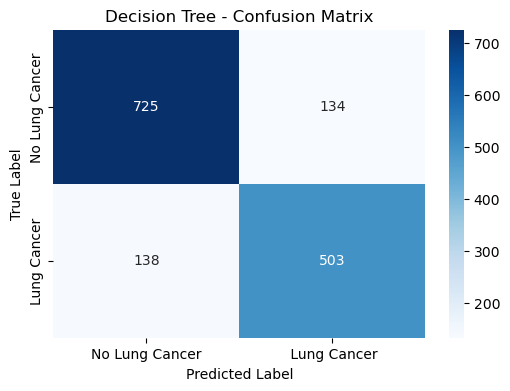

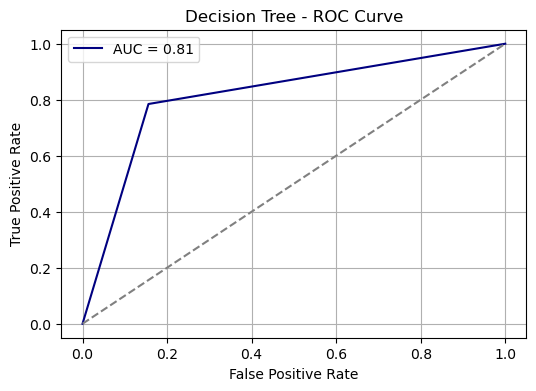

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define base Decision Tree model
base_dtc = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2
)

# Step 2: Train and evaluate using existing function
dtc = train_model(base_dtc, X_train_scaled, y_train, X_test_scaled, y_test)

# Get predictions
y_pred_dtc = dtc.predict(X_test_scaled)

# Step 3: (Optional) Hyperparameter tuning
dtc_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Uncomment to tune:
# best_dtc_params = hyperparameter_tuning(base_dtc, dtc_param_grid, X_train_scaled, y_train)
# tuned_dtc = DecisionTreeClassifier(**best_dtc_params, random_state=42)
# dtc = train_model(tuned_dtc, X_train_scaled, y_train, X_test_scaled, y_test)
# y_pred_dtc = dtc.predict(X_test_scaled)

# Step 4: Confusion Matrix
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lung Cancer', ' Lung Cancer'], yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# Step 5: AUC-ROC Curve
y_proba_dtc = dtc.predict_proba(X_test_scaled)[:, 1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_proba_dtc)
auc_dtc = roc_auc_score(y_test, y_proba_dtc)

plt.figure(figsize=(6, 4))
plt.plot(fpr_dtc, tpr_dtc, label=f'AUC = {auc_dtc:.2f}', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Kneighbours model¶

✅ Sample of Training Labels: [0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
✅ Sample of Predictions: [0 0 1 0 0 1 1 1 0 0]
🎯 Accuracy: 0.8587

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       859
           1       0.82      0.86      0.84       641

    accuracy                           0.86      1500
   macro avg       0.85      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500

📉 Confusion Matrix:
 [[737 122]
 [ 90 551]]
🔁 10-Fold Cross-Validation Accuracy Scores: [0.85142857 0.85142857 0.87714286 0.85428571 0.86285714 0.84285714
 0.84857143 0.85714286 0.84857143 0.85428571]


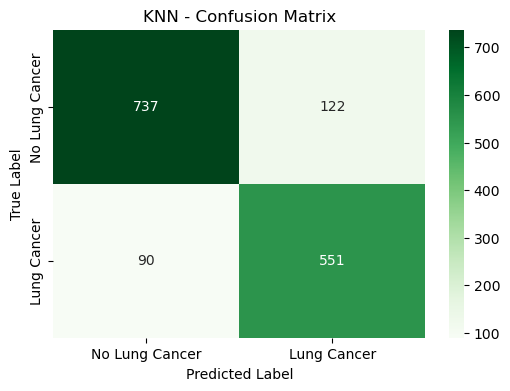

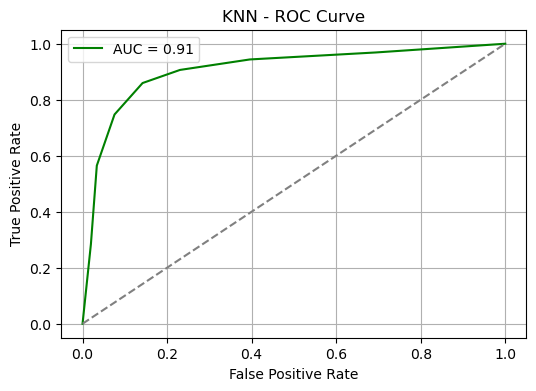

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the KNN model
model = KNeighborsClassifier(n_neighbors=7)

# Step 2: Train using existing function
KNN = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

# Step 3: Predict and Evaluate
y_pred_knn = KNN.predict(X_test_scaled)

# Optional: Define param grid for tuning
KNN_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

# Uncomment this to run tuning:
# best_knn_params = hyperparameter_tuning(model, KNN_param_grid, X_train_scaled, y_train)
# best_knn = KNeighborsClassifier(**best_knn_params)
# KNN = train_model(best_knn, X_train_scaled, y_train, X_test_scaled, y_test)
# y_pred_knn = KNN.predict(X_test_scaled)

# Step 4: Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['No Lung Cancer', 'Lung Cancer'], yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN - Confusion Matrix')
plt.show()

# Step 5: ROC Curve and AUC
y_proba_knn = KNN.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'AUC = {auc_knn:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

def evaluate_model(name, model, X_test, y_test, X_train, y_train):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    scores = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba),
        "CV Mean Accuracy": cross_val_score(model, X_train, y_train, cv=5).mean()
    }
    return scores

In [57]:
# Step 1: Encode the target column BEFORE splitting
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].replace({'NO': 0, 'YES': 1})
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].infer_objects(copy=False).astype(int)
# Step 2: Split the data
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#XG BOOST

In [ ]:
!pip install xgboost

In [58]:
from xgboost import XGBClassifier

# Train XGBoost Model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Predict
xgb_y_pred = xgb.predict(X_test_scaled)
xgb_y_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# Initialize model_scores if not done
model_scores = []

# Evaluate (Assuming evaluate_model function exists)
model_scores.append(evaluate_model("XGBoost", xgb, X_test_scaled, y_test, X_train_scaled, y_train))

# Show result
results_df = pd.DataFrame(model_scores).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("📊 Model Comparison including XGBoost:")
print(results_df)

📊 Model Comparison including XGBoost:
     Model  Accuracy  Precision    Recall  F1 Score       AUC  \
0  XGBoost     0.882   0.875405  0.843994  0.859412  0.909113   

   CV Mean Accuracy  
0          0.890857  


In [60]:
from xgboost import XGBClassifier

# Initialize and Train
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Predictions
xgb_y_pred = xgb.predict(X_test_scaled)

# Optional: Probabilities for ROC or thresholds
xgb_y_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluate (replace with your own evaluation function if defined)
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("\n🔍 XGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, xgb_y_pred):.2f}")
print(f"✅ ROC AUC Score: {roc_auc_score(y_test, xgb_y_proba):.2f}")

C:\Users\famorotio\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:51:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       859
           1       0.88      0.84      0.86       641

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500

✅ Accuracy: 0.88
✅ ROC AUC Score: 0.91


In [61]:
# Step 1: Encode the target column BEFORE splitting
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].replace({'NO': 0, 'YES': 1})
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].infer_objects(copy=False).astype(int)
# Step 2: Split the data
X = df.drop('PULMONARY_DISEASE', axis=1)
y = df['PULMONARY_DISEASE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(name, model, X_test, y_test, X_train=None, y_train=None):
    y_pred = model.predict(X_test)
    
    # Convert to numeric if needed
    if isinstance(y_pred[0], str):
        y_pred = pd.Series(y_pred).replace({'NO': 0, 'YES': 1}).astype(int)
        
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(report)
    
    return {"Model": name, "Accuracy": acc}

In [63]:
# Required Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pandas as pd

# Train Models
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Evaluate and Compare
model_scores = []

model_scores.append(evaluate_model("Logistic Regression (Tuned)", trained_logreg, X_test_scaled, y_test, X_train_scaled, y_train))
model_scores.append(evaluate_model("Random Forest", rfc, X_test_scaled, y_test, X_train_scaled, y_train))
model_scores.append(evaluate_model("Decision Tree", dtc, X_test_scaled, y_test, X_train_scaled, y_train))
model_scores.append(evaluate_model("KNN", knn, X_test_scaled, y_test, X_train_scaled, y_train))
model_scores.append(evaluate_model("XGBoost", xgb, X_test_scaled, y_test, X_train_scaled, y_train))

# Results Table
results_df = pd.DataFrame(model_scores)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Show Comparison
print("📊 Model Comparison (Including XGBoost):")
print(results_df)


Model: Logistic Regression (Tuned)
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       859
           1       0.88      0.90      0.89       641

    accuracy                           0.91      1500
   macro avg       0.90      0.91      0.90      1500
weighted avg       0.91      0.91      0.91      1500

Model: Random Forest
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       859
           1       0.90      0.86      0.88       641

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       859
           1       0.79      0.78      0.79       641

    accuracy                           0.82      1500
   macro avg       0.81      0.81      0.81      15

In [64]:
# Ensure required libraries are imported
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Train XGBoost Model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Make Predictions
xgb_y_pred = xgb.predict(X_test_scaled)
xgb_y_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# Print Results
print("\n🔍 XGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))

print(f"✅ Accuracy: {accuracy_score(y_test, xgb_y_pred):.2f}")
print(f"✅ ROC AUC Score: {roc_auc_score(y_test, xgb_y_proba):.2f}")

C:\Users\famorotio\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:58:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       859
           1       0.88      0.84      0.86       641

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500

✅ Accuracy: 0.88
✅ ROC AUC Score: 0.91


In [ ]:
#MODELS RESULTS

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

def evaluate_model(name, model, X_test, y_test, X_train, y_train, cv=5):
    """
    Evaluates a classification model and returns key performance metrics.
    
    Parameters:
        name (str): Name/identifier for the model.
        model: Trained model object.
        X_test, y_test: Test feature matrix and target vector.
        X_train, y_train: Training feature matrix and target vector.
        cv (int): Number of folds for cross-validation (default=5).
        
    Returns:
        dict: Dictionary containing model performance metrics.
    """
    
    y_pred = model.predict(X_test)
    
    # Some models might not have predict_proba (e.g., some SVM configs)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except AttributeError:
        auc = None  # AUC not available
    
    scores = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": auc,
        "CV Mean Accuracy": cross_val_score(model, X_train, y_train, cv=cv).mean()
    }
    return scores
    results = evaluate_model("Logistic Regression", final_model, X_test_scaled, y_test, X_train_scaled, y_train)
    print(results)


In [65]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def evaluate_model(name, model, X_test, y_test, X_train=None, y_train=None):
    y_pred = model.predict(X_test)

    # Ensure predictions are numeric
    y_pred = pd.Series(y_pred).replace({'NO': 0, 'YES': 1}).astype(int)

    # Ensure true labels are numeric
    y_test = y_test.replace({'NO': 0, 'YES': 1}).astype(int)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"✅ Model: {name}")
    print(report)

    return {"Model": name, "Accuracy": acc}

In [66]:
# Required Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pandas as pd

# Train Models
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Evaluate and Compare
model_scores = []

model_scores.append(evaluate_model("Logistic Regression (Tuned)", trained_logreg, X_test_scaled, y_test, X_train_scaled, y_train))
model_scores.append(evaluate_model("Random Forest", rfc, X_test_scaled, y_test, X_train_scaled, y_train))
model_scores.append(evaluate_model("Decision Tree", dtc, X_test_scaled, y_test, X_train_scaled, y_train))
model_scores.append(evaluate_model("KNN", knn, X_test_scaled, y_test, X_train_scaled, y_train))
model_scores.append(evaluate_model("XGBoost", xgb, X_test_scaled, y_test, X_train_scaled, y_train))

# Results Table
results_df = pd.DataFrame(model_scores)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Show Comparison
print("📊 Model Comparison (Including XGBoost):")
print(results_df)


C:\Users\famorotio\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:59:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model: Logistic Regression (Tuned)
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       859
           1       0.88      0.90      0.89       641

    accuracy                           0.91      1500
   macro avg       0.90      0.91      0.90      1500
weighted avg       0.91      0.91      0.91      1500

✅ Model: Random Forest
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       859
           1       0.90      0.86      0.88       641

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500

✅ Model: Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       859
           1       0.79      0.78      0.79       641

    accuracy                           0.82      1500
   macro avg       0.81      0.81      0.81  

In [ ]:
**See the actual values vs predicted values**

In [67]:

y_test = y_test.replace({'NO': 0, 'YES': 1}).astype(int)

# Generate predictions
logreg_y_pred = trained_logreg.predict(X_test_scaled)
logreg_y_proba = trained_logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (Lung Cancer)

# Create prediction DataFrame
pred_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': logreg_y_pred,
    'Probability_Of_Lung_Cancer': logreg_y_proba
})

# Add Reason column based on probability thresholds
pred_df['Reason'] = pred_df['Probability_Of_Lung_Cancer'].apply(
    lambda p: "✅ Diagnosed with Lung Cancer (Pulmonary Disease)" if p >= 0.8 else
              "🟡 Likely to be diagnosed with Lung Cancer (borderline)" if p >= 0.6 else
              "⚠️ Uncertain" if 0.4 < p < 0.6 else
              "❌ Healthy"
)

# Show first 10 rows
pred_df.head(10)

Actual  Predicted  Probability_Of_Lung_Cancer  \
0       0          0                    0.005628   
1       0          0                    0.303131   
2       0          0                    0.410315   
3       0          0                    0.009135   
4       0          0                    0.281372   
5       0          1                    0.534877   
6       1          1                    0.674396   
7       1          1                    0.829888   
8       0          0                    0.145536   
9       1          0                    0.480781   

                                              Reason  
0                                          ❌ Healthy  
1                                          ❌ Healthy  
2                                       ⚠️ Uncertain  
3                                          ❌ Healthy  
4                                          ❌ Healthy  
5                                       ⚠️ Uncertain  
6  🟡 Likely to be diagnosed with Lung Cancer (bor...  
7   ✅ Diagnosed with Lung Cancer (Pulmonary Disease)  
8                                          ❌ Healthy  
9                                       ⚠️ Uncertain

In [62]:
# Ensure y_test is numeric
y_test = y_test.replace({'NO': 0, 'YES': 1}).astype(int)

# Helper Function for Reason Mapping
def map_reason(prob):
    if prob >= 0.8:
        return "✅ Diagnosed with Lung Cancer (Pulmonary Disease)"
    elif prob >= 0.6:
        return "🟡 Likely to be diagnosed with Lung Cancer (borderline)"
    elif 0.4 < prob < 0.6:
        return "⚠️ Uncertain"
    else:
        return "❌ Healthy"

# Logistic Regression
logreg_y_pred = trained_logreg.predict(X_test_scaled)
logreg_y_proba = trained_logreg.predict_proba(X_test_scaled)[:, 1]
logreg_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': logreg_y_pred,
    'Probability_Of_Lung_Cancer': logreg_y_proba,
    'Reason': [map_reason(p) for p in logreg_y_proba]
})
print("\nLogistic Regression Predictions:")
print(logreg_df.head(10))

# Random Forest
rfc_y_pred = rfc.predict(X_test_scaled)
rfc_y_proba = rfc.predict_proba(X_test_scaled)[:, 1]
rfc_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': rfc_y_pred,
    'Probability_Of_Lung_Cancer': rfc_y_proba,
    'Reason': [map_reason(p) for p in rfc_y_proba]
})
print("\nRandom Forest Predictions:")
print(rfc_df.head(10))

# Decision Tree
dtc_y_pred = dtc.predict(X_test_scaled)
dtc_y_proba = dtc.predict_proba(X_test_scaled)[:, 1]
dtc_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': dtc_y_pred,
    'Probability_Of_Lung_Cancer': dtc_y_proba,
    'Reason': [map_reason(p) for p in dtc_y_proba]
})
print("\nDecision Tree Predictions:")
print(dtc_df.head(10))

# K-Nearest Neighbors
knn_y_pred = knn.predict(X_test_scaled)
knn_y_proba = knn.predict_proba(X_test_scaled)[:, 1]
knn_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': knn_y_pred,
    'Probability_Of_Lung_Cancer': knn_y_proba,
    'Reason': [map_reason(p) for p in knn_y_proba]
})
print("\nKNN Predictions:")
print(knn_df.head(10))

# XGBoost
xgb_y_pred = xgb.predict(X_test_scaled)
xgb_y_proba = xgb.predict_proba(X_test_scaled)[:, 1]
xgb_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': xgb_y_pred,
    'Probability_Of_Lung_Cancer': xgb_y_proba,
    'Reason': [map_reason(p) for p in xgb_y_proba]
})
print("\nXGBoost Predictions:")
print(xgb_df.head(10))


Logistic Regression Predictions:
   Actual  Predicted  Probability_Of_Lung_Cancer  \
0       0          0                    0.006281   
1       0          0                    0.299275   
2       0          0                    0.338915   
3       0          0                    0.007167   
4       0          0                    0.246222   
5       0          1                    0.511700   
6       1          1                    0.698168   
7       1          1                    0.806975   
8       0          0                    0.132420   
9       1          0                    0.425152   

                                              Reason  
0                                          ❌ Healthy  
1                                          ❌ Healthy  
2                                          ❌ Healthy  
3                                          ❌ Healthy  
4                                          ❌ Healthy  
5                                       ⚠️ Uncertain  
6  🟡 Lik

In [63]:
import joblib

# Save model
joblib.dump(trained_logreg, 'best_model_logreg.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


In [65]:
import os

In [2]:

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('scaler', exist_ok=True)

In [68]:
import pickle

# Save models
with open('models/trained_logreg.pkl', 'wb') as f:
    pickle.dump(trained_logreg, f)

with open('models/rfc.pkl', 'wb') as f:
    pickle.dump(rfc, f)

with open('models/dtc.pkl', 'wb') as f:
    pickle.dump(dtc, f)

with open('models/knn.pkl', 'wb') as f:
    pickle.dump(knn, f)

with open('models/xgb.pkl', 'wb') as f:
    pickle.dump(xgb, f)

# Save scaler
with open('scaler/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [68]:
import os
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Replace with your actual dataset
data = pd.read_csv("Lung Cancer Dataset.csv")

X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE'].replace({'YES': 1, 'NO': 0}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

os.makedirs('models', exist_ok=True)
os.makedirs('scaler', exist_ok=True)

with open('models/trained_logreg.pkl', 'wb') as f:
    pickle.dump(logreg, f)

with open('scaler/trained_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Models and scaler saved successfully.")

C:\Users\famorotio\AppData\Local\Temp\ipykernel_12572\2344901452.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['PULMONARY_DISEASE'].replace({'YES': 1, 'NO': 0}).astype(int)


✅ Models and scaler saved successfully.


In [2]:
pip install flask_sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
